In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=0)

In [3]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
43,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [4]:
df=dataset

In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
43,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
df=df.dropna().reset_index(drop=True)

In [7]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [10]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          121 non-null    int64  
 1   month        121 non-null    int64  
 2   year         121 non-null    int64  
 3   Temperature  121 non-null    int64  
 4   RH           121 non-null    int64  
 5   Ws           121 non-null    int64  
 6   Rain         121 non-null    float64
 7   FFMC         121 non-null    float64
 8   DMC          121 non-null    float64
 9   DC           121 non-null    object 
 10  ISI          121 non-null    float64
 11  BUI          121 non-null    float64
 12  FWI          121 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.4+ KB


In [12]:
df[['DC','FWI']]=df[['DC','FWI']].astype(float)

In [13]:
df_copy=df

In [14]:
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [15]:
df_copy=df_copy.drop(['day','month','year'],axis=1)

In [16]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [17]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [18]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [19]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
116,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
117,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
118,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
119,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
120,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [20]:
df_copy['Classes'].value_counts()

Classes
1    78
0    43
Name: count, dtype: int64

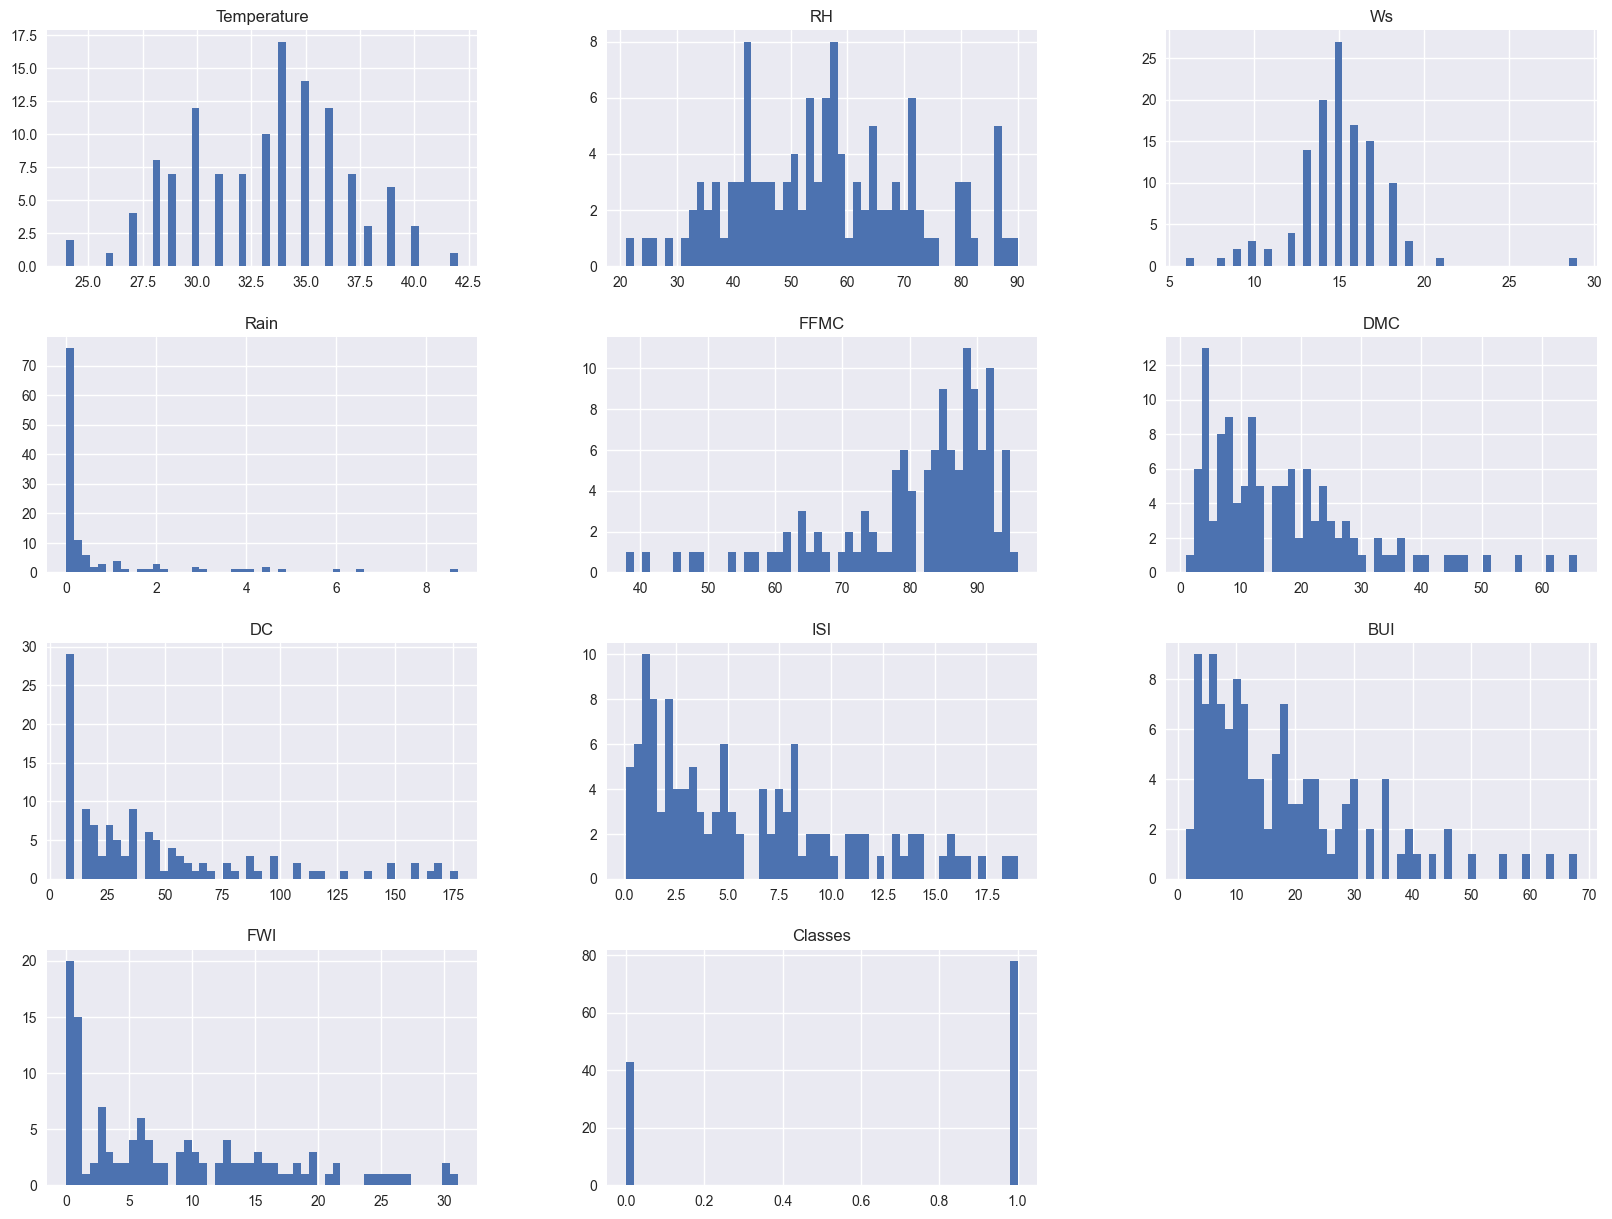

In [21]:
plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [22]:
percentage=df_copy['Classes'].value_counts(normalize=True)*100

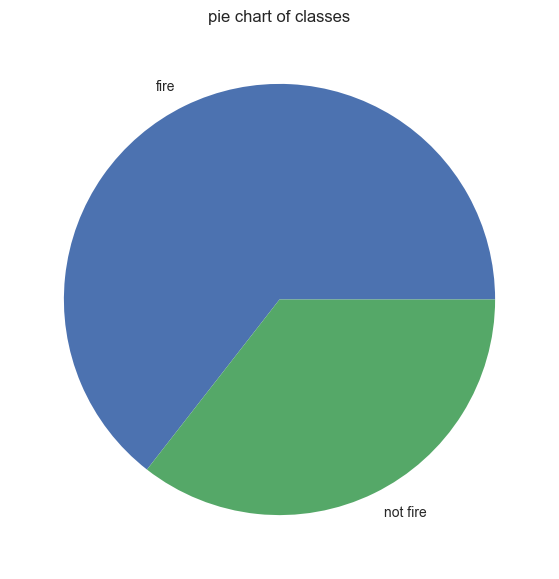

In [23]:
classlabels=['fire','not fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels)
plt.title("pie chart of classes")
plt.show()

In [24]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),'not fire','fire')

Text(0.5, 1.0, 'fire analysis:')

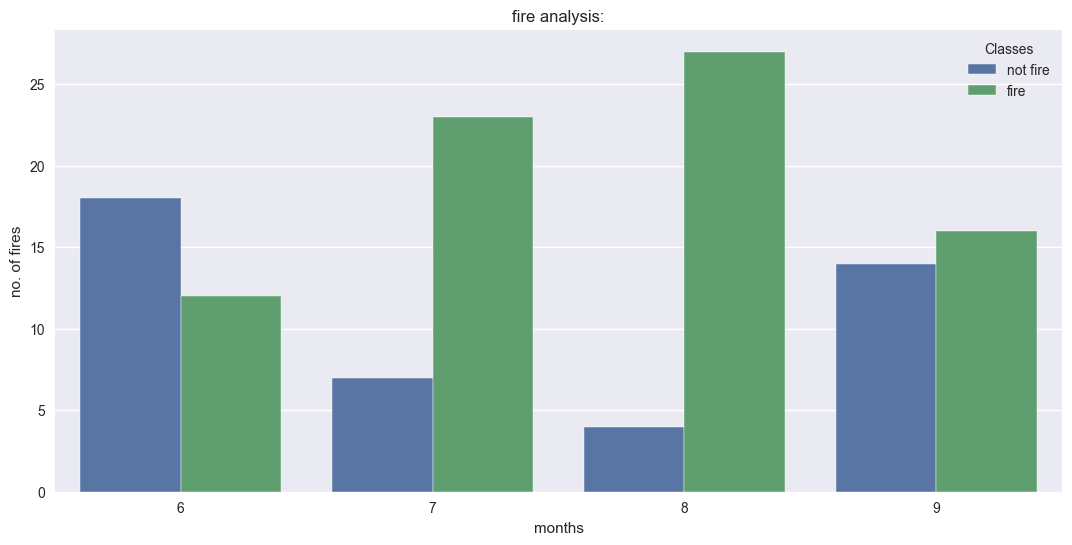

In [25]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue="Classes",data=df)
plt.ylabel('no. of fires')
plt.xlabel('months')
plt.title('fire analysis:')

In [26]:
df.to_csv('algerian_dataset.csv')

In [2]:
##new dataset

df=pd.read_csv('algerian_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [4]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
X=df.drop('Temperature',axis=1)
y=df['Temperature']

In [9]:
X

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0
...,...,...,...,...,...,...,...,...,...,...
116,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
117,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
118,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
119,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [10]:
y

0      32
1      30
2      29
3      30
4      32
       ..
116    30
117    28
118    27
119    24
120    24
Name: Temperature, Length: 121, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=23)

In [12]:
X_train.shape,X_test.shape

((90, 10), (31, 10))

In [13]:
y_train.shape,y_test.shape

((90,), (31,))

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 107 to 83
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RH       90 non-null     int64  
 1   Ws       90 non-null     int64  
 2   Rain     90 non-null     float64
 3   FFMC     90 non-null     float64
 4   DMC      90 non-null     float64
 5   DC       90 non-null     float64
 6   ISI      90 non-null     float64
 7   BUI      90 non-null     float64
 8   FWI      90 non-null     float64
 9   Classes  90 non-null     int64  
dtypes: float64(7), int64(3)
memory usage: 7.7 KB


In [15]:
X_train.corr()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
RH,1.000000,0.190893,0.124783,-0.662096,-0.465728,-0.337495,-0.684000,-0.440318,-0.618622,-0.455289
Ws,0.190893,1.000000,-0.139551,-0.039064,0.027653,0.005522,0.103859,0.022068,0.080481,0.033799
Rain,0.124783,-0.139551,1.000000,-0.440186,-0.368205,-0.371754,-0.410086,-0.375437,-0.412675,-0.456818
FFMC,-0.662096,-0.039064,-0.440186,1.000000,0.637392,0.545615,0.759752,0.626815,0.730102,0.806149
DMC,-0.465728,0.027653,-0.368205,0.637392,1.000000,0.893791,0.706126,0.990115,0.889111,0.581833
DC,-0.337495,0.005522,-0.371754,0.545615,0.893791,1.000000,0.572758,0.946063,0.786474,0.529761
ISI,-0.684000,0.103859,-0.410086,0.759752,0.706126,0.572758,1.000000,0.678693,0.922205,0.715535
BUI,-0.440318,0.022068,-0.375437,0.626815,0.990115,0.946063,0.678693,1.000000,0.875627,0.579891
FWI,-0.618622,0.080481,-0.412675,0.730102,0.889111,0.786474,0.922205,0.875627,1.000000,0.700312
Classes,-0.455289,0.033799,-0.456818,0.806149,0.581833,0.529761,0.715535,0.579891,0.700312,1.000000


In [16]:
X_test.corr()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
RH,1.000000,0.006722,0.285851,-0.597758,-0.144588,-0.119388,-0.722152,-0.142710,-0.558505,-0.410813
Ws,0.006722,1.000000,-0.151357,0.045287,0.051869,0.094657,0.229399,0.079105,0.212534,0.110932
Rain,0.285851,-0.151357,1.000000,-0.849253,-0.298324,-0.270074,-0.446545,-0.312466,-0.416781,-0.551487
FFMC,-0.597758,0.045287,-0.849253,1.000000,0.426039,0.312812,0.736255,0.435003,0.687626,0.754173
DMC,-0.144588,0.051869,-0.298324,0.426039,1.000000,0.860899,0.414398,0.982654,0.755645,0.410348
DC,-0.119388,0.094657,-0.270074,0.312812,0.860899,1.000000,0.213427,0.890608,0.548312,0.283743
ISI,-0.722152,0.229399,-0.446545,0.736255,0.414398,0.213427,1.000000,0.412814,0.894649,0.639565
BUI,-0.142710,0.079105,-0.312466,0.435003,0.982654,0.890608,0.412814,1.000000,0.759756,0.456248
FWI,-0.558505,0.212534,-0.416781,0.687626,0.755645,0.548312,0.894649,0.759756,1.000000,0.636600
Classes,-0.410813,0.110932,-0.551487,0.754173,0.410348,0.283743,0.639565,0.456248,0.636600,1.000000


In [17]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [18]:
high_corr_cols = correlation(X_train, 0.87)  # Getting highly correlated columns
print("Columns to be removed:", high_corr_cols)  # Debugging Step

# Remove correlated columns (if any)
X_train = X_train.drop(columns=high_corr_cols, errors='ignore')
X_test = X_test.drop(columns=high_corr_cols, errors='ignore')


Columns to be removed: {'FWI', 'DC', 'BUI'}


In [19]:
# X_train.shape,X_test.shape
X_train.shape

(90, 7)

In [20]:
X_test.shape

(31, 7)

In [21]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

In [22]:
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [23]:
# X_train_scaled

<Axes: >

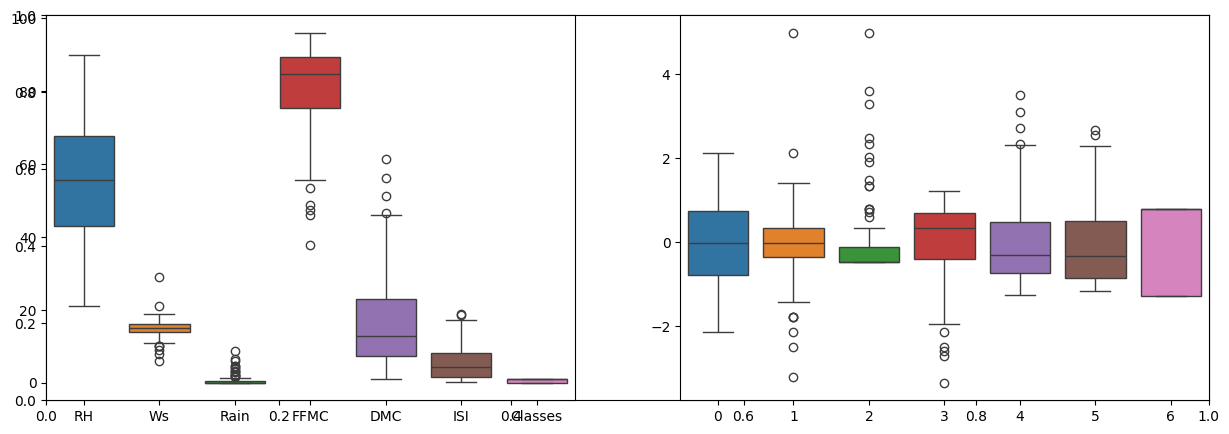

In [24]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
# plt.subplots(figsize=(15,5))
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)

In [49]:
#linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

regressor=LinearRegression()

mae : 2.1881026742975083
score:  0.408392407935284


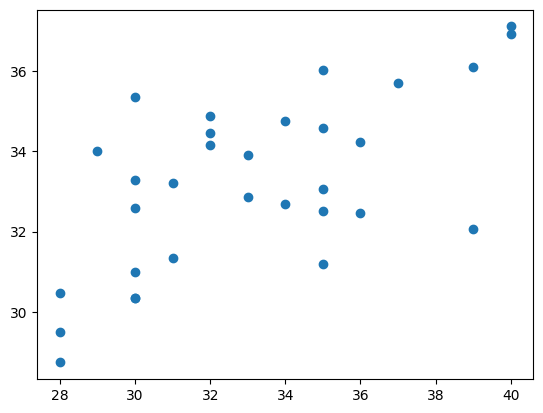

In [50]:
regressor.fit(X_train_scaled,y_train)
y_pred_test=regressor.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_test)
score=r2_score(y_test,y_pred_test)
print('mae :',mae)
print('score: ',score)
plt.scatter(y_test,y_pred_test)

In [51]:
#Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso=Lasso()

mae:  2.519570040668518
score:  0.2690302314256503


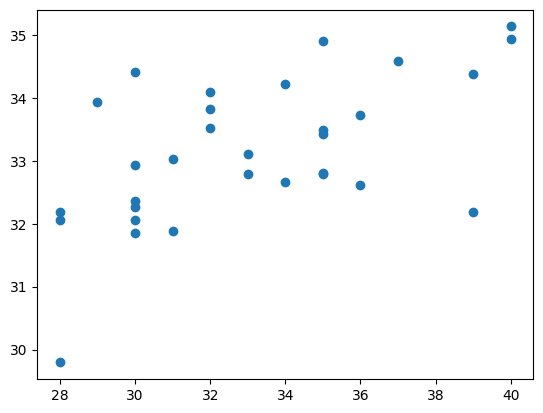

In [52]:
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('mae: ',mae)
print('score: ',score)
plt.scatter(y_test,y_pred)

mae:  2.1884472596715305
score:  0.41059160010070817


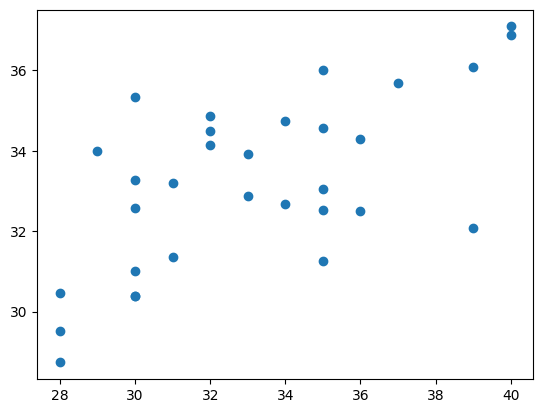

In [25]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('mae: ',mae)
print('score: ',score)
plt.scatter(y_test,y_pred)

mae:  17.14348087084353
score:  -32.92298424081791


C:\Users\ksaur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(


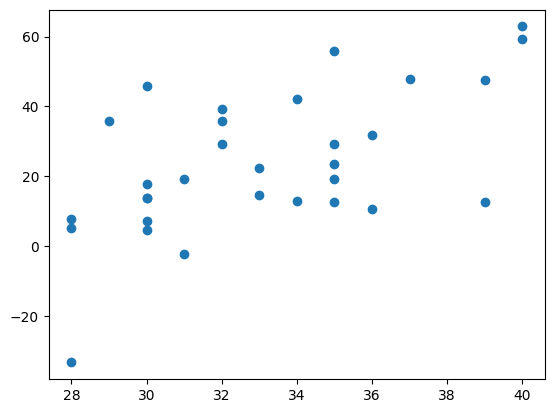

In [31]:
#RidgeCV

from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=10)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae: ",mae)
print('score: ',score)
plt.scatter(y_test,y_pred)



In [32]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 10,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

mae: 2.4377254383123717
score:  0.3262225733159788


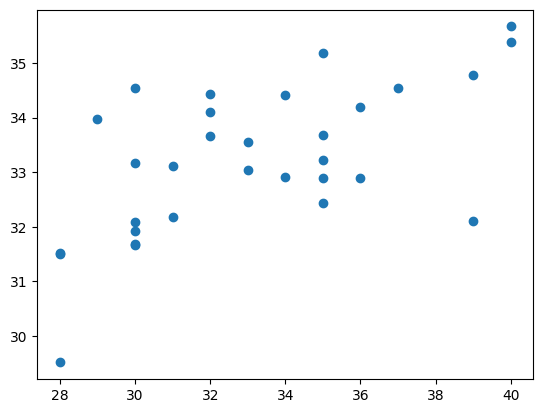

In [34]:
#ElasticNet

from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet()
elastic_net.fit(X_train_scaled,y_train)
y_pred=elastic_net.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('mae:',mae)
print('score: ',score)
plt.scatter(y_test,y_pred)

In [36]:
from sklearn.linear_model import ElasticNetCV

elasticCV=ElasticNetCV(cv=10)

mae:  2.214430750192095
score:  0.4175666122071676


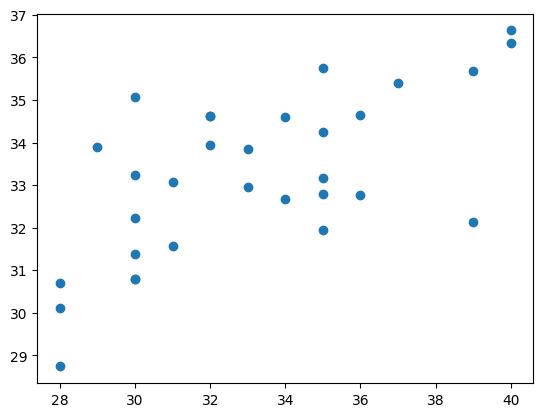

In [37]:
elasticCV.fit(X_train_scaled,y_train)
y_pred=elasticCV.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('mae: ',mae)
print('score: ',score)
plt.scatter(y_test,y_pred)


In [42]:
import pickle
pickle.dump(Scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [39]:
Scaler

StandardScaler()